In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import shutil
import cv2

# Initialize TensorBoard

In [2]:
tsb=tf.keras.callbacks.TensorBoard(log_dir="logs")

# Open Dataset Directory

In [3]:
DATA_DIR=r"C:\Users\speed\Documents\Wild Animals Classification TensorFlow CNN\data"
classes=[i for i in os.listdir(DATA_DIR)]

# Create Dataset

In [4]:
train=[]
for i in os.listdir(DATA_DIR):
    current_path=os.path.join(DATA_DIR,i)
    current_class=classes.index(i)
    for j in os.listdir(current_path):
        img=cv2.imread(os.path.join(DATA_DIR,i,j),cv2.IMREAD_GRAYSCALE)
        try:
            res_img=cv2.resize(img,(70,70))
        except:
            continue
        train.append([res_img,current_class])
random.shuffle(train)
x=[]
y=[]
for i,j in train:
    x.append(i)
    y.append(j)
x=np.array(x)
y=np.array(y)

# Create Model

In [5]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128,(3,3),input_shape=(70,70,1),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(len(classes),activation="softmax")
])

# Get Summary Of Model

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0

# Compile The Model

In [7]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train The Model

In [8]:
model.fit(x,y,epochs=25,callbacks=[tsb],validation_split=0.2)

Epoch 1/25
44/44 [==============================] - 29s 650ms/step - loss: 5.8258 - accuracy: 0.1676 - val_loss: 1.7878 - val_accuracy: 0.2319
Epoch 2/25
44/44 [==============================] - 26s 591ms/step - loss: 1.7809 - accuracy: 0.2155 - val_loss: 1.7879 - val_accuracy: 0.2435
Epoch 3/25
44/44 [==============================] - 22s 503ms/step - loss: 1.7462 - accuracy: 0.2467 - val_loss: 1.8707 - val_accuracy: 0.1449
Epoch 4/25
44/44 [==============================] - 31s 691ms/step - loss: 1.7054 - accuracy: 0.2801 - val_loss: 7.7938 - val_accuracy: 0.1478
Epoch 5/25
44/44 [==============================] - 31s 700ms/step - loss: 1.8593 - accuracy: 0.2329 - val_loss: 1.8349 - val_accuracy: 0.2493
Epoch 6/25
44/44 [==============================] - 23s 533ms/step - loss: 1.6658 - accuracy: 0.3084 - val_loss: 1.8455 - val_accuracy: 0.2522
Epoch 7/25
44/44 [==============================] - 30s 695ms/step - loss: 1.6246 - accuracy: 0.3186 - val_loss: 2.0700 - val_accuracy: 0.2638

# Predict On Sample Images

In [9]:
def prepare(filepath):
    img=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(70,70))
    return img.reshape(-1,70,70,1)

1/1 [==============================] - 0s 111ms/step
fox


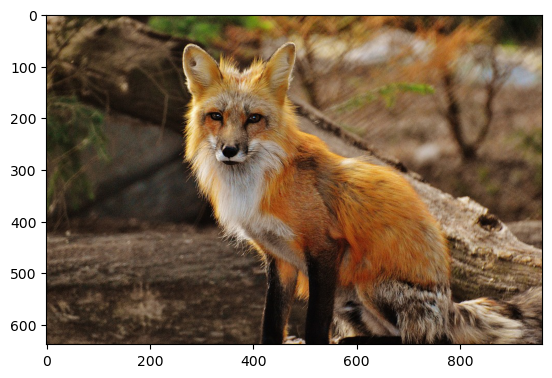

In [10]:
path=r"C:\Users\speed\Downloads\fox-5042210_960_720.jpg"
print(classes[int(np.argmax(model.predict(prepare(path))))])
plt.imshow(plt.imread(path))

1/1 [==============================] - 0s 24ms/step
wolf


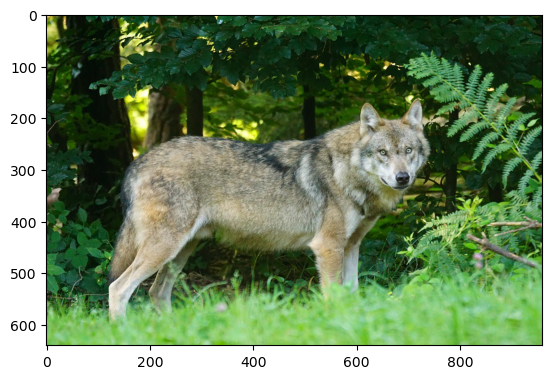

In [11]:
path=r"C:\Users\speed\Downloads\wolf-62898_960_720.jpg"
print(classes[int(np.argmax(model.predict(prepare(path))))])
plt.imshow(plt.imread(path))

1/1 [==============================] - 0s 21ms/step
tiger


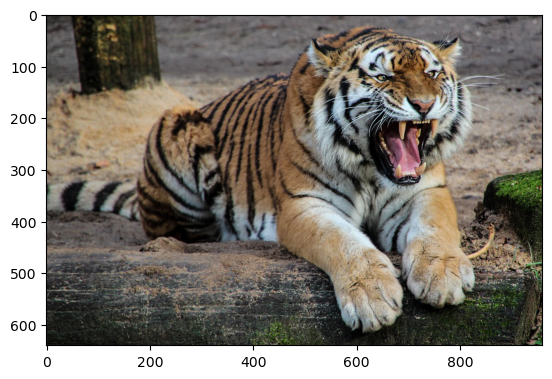

In [12]:
path=r"C:\Users\speed\Downloads\tiger-500118_960_720.jpg"
print(classes[int(np.argmax(model.predict(prepare(path))))])
plt.imshow(plt.imread(path))

1/1 [==============================] - 0s 20ms/step
fox


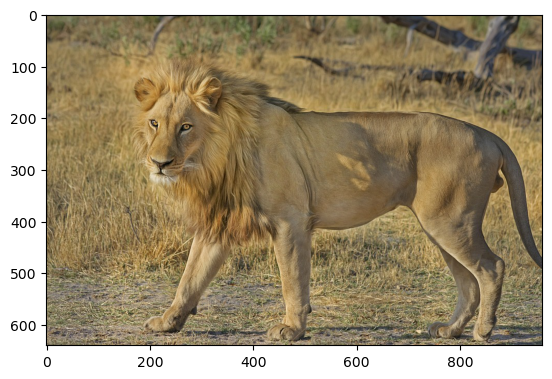

In [13]:
path=r"C:\Users\speed\Downloads\lion-515028_960_720.jpg"
print(classes[int(np.argmax(model.predict(prepare(path))))])
plt.imshow(plt.imread(path))

1/1 [==============================] - 0s 20ms/step
hyena


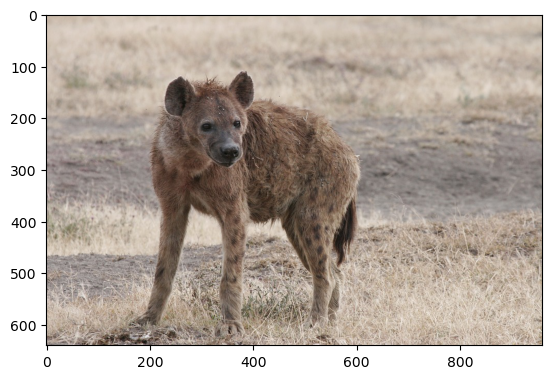

In [14]:
path=r"C:\Users\speed\Downloads\hyena-3426693_960_720.jpg"
print(classes[int(np.argmax(model.predict(prepare(path))))])
plt.imshow(plt.imread(path))

# Save The Model

In [15]:
model.save("wild_animals_classifier.h5")

# Convert Model To TFLite Model For Edge Devices

In [16]:
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
with open("wild_animals_classifier.tflite","wb")as f:
    f.write(tf_lite_converter.convert())

INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmpd12wmzk_\assets


INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmpd12wmzk_\assets
